# Inflatable straight beam in a wind tunnel

An inflatable tube kite is supported by two bridle lines at the tips of the wing. The bridle lines merge below the kite to the main tether. The wind velocity is in-plane direction and causes a distributed lift load $q=\frac{1}{2}\rho U^2 c_L c$ where $\rho$ is the density of the air, $U$ is the apparent wind velocity, $c_L$ is the section lift coefficient and $c$ is the chord length.

![straight beam](img/straight_beam.svg)

The tether tension is $T=qb$ and the bridle line tension is given by 
$$
B_y = \frac{1}{2} T \\
B = \frac{B_y}{\sin \alpha} = \frac{T}{2 \sin \alpha}.
$$
The bridle lines pull the beam from the tips which induces a compressive normal force $B_x=B \cos \alpha=\frac{T \cos \alpha}{2 \sin \alpha} = \frac{T }{2 \tan \alpha}$. The bridle lines are attached at the bottom of the beam but the eccentricity of the attachment points is not taken into account.
The beam has the highest bending moment in the middle $M=\frac{1}{8} q b^2$ which results in a maximum compressive stress at the lowermost location of the beam. The maximum compressive stress in axial direction from the bending moment is given by
$\sigma_{BM} = \frac{M r}{I}$
where I is the second moment of area. The combined stresses in axial direction are
$$
\sigma_x = p - \frac{B_x}{A} - \frac{M r}{I}\\
$$
where $A$ is the area of the cross-section. The combined stresses at the middle of the beam are illustrated as follows

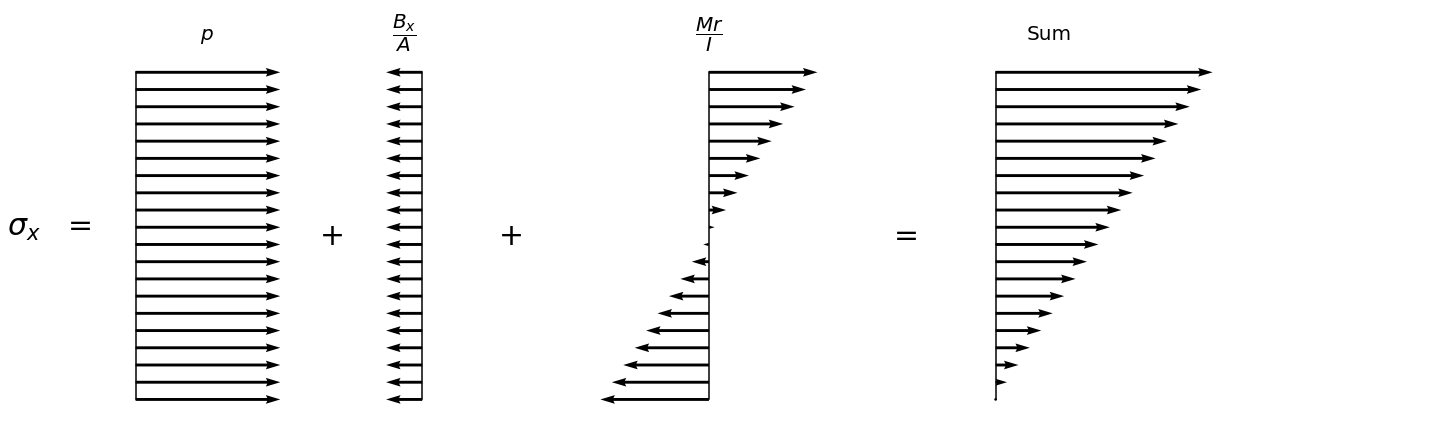

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,figsize=(20,6))
n = 20
scale = 2
pressure = 1 * np.ones(n)
compression = -0.25 * np.ones(n)
bending = 0.75 * np.linspace(-1,1,n)
net = pressure + compression + bending
loads = [pressure, compression, bending, net]
y = np.linspace(0,1,n)
operators = ['+','+','=',None]
labels = ['$p$', '$\dfrac{B_x}{A}$', '$\dfrac{M r}{I}$','Sum'] 
label_names = ['pressure', 'compression', 'bending','sum']
for i, (l, op, label) in enumerate(zip(loads, operators, labels)):
    ax.quiver(i*1 + np.zeros(n), y, l, 0, scale=scale, units='xy', width=0.01)
    ax.plot([i*1, i*1],[0,1],color='k')
    if i != len(loads)-1:
        annx = (i + (i+1) + (np.max(np.append(l,0))+ np.min(np.append(loads[i+1],0)))/scale)/2
        ax.annotate(op, (annx, 0.5), fontsize=30, ha='center', va='center')
    ax.annotate(label, (i + np.mean(l)/2/scale,1.1),ha='center', fontsize=20)
ax.annotate('$\sigma_x$   =', (-0.3, 0.5), ha='center', fontsize=30)
ax.set_xlim(-0.3,4.5)
ax.set_ylim(-0.05, 1.2)
plt.axis('off')
plt.tight_layout()
plt.show()

The area and the second moment of area of a circle are given by $A = \pi r^2$ and $I=\frac{\pi r^4}{4}$ respectively
$$
\sigma_x = p - \frac{T}{2\pi r^2  \tan \alpha} - \frac{q b^2 r}{2 \pi r^4}\\
\sigma_x = p - \frac{qb}{2\pi r^2}\left(\frac{1}{\tan \alpha}-\frac{b}{r}\right)
$$
The wrinkling starts when the compressive axial stresses from normal force and bending exceed the internal pressure

$$p=\frac{1}{2}\frac{qb}{\pi r^2}\left(\frac{1}{\tan \alpha}+\frac{b}{r}\right)$$

The ratio between the compressive stresses from the normal force and the bending moment is given by
$R=\frac{r}{b \tan \alpha}$

### Example 1: V3 LEI kite

Let us put the kite in the wind tunnel with 30 m/s wind velocity. The front bridle line is assumed to take half of the loading and therefore the chord length is $c=1.35 m$. The section lift coefficient is assumed $c_L = 1.2$. What is the required pre-inflation pressure to keep the kite taut?
$$
\begin{aligned}
q&=\frac{1}{2}\rho U^2 c_L b\\
\rho&=1.2kg/m^3 \\
U&=30m/s \\
c_L&=1\\
b&=1m\\
r&=0.1m
\end{aligned}
$$

The span of the V3 kite is the length of the beam and the KCU hangs 11 meters below the kite. Then 
$$\tan \alpha = \frac{11m}{4.15m}$$

In [2]:
import numpy as np
rho   = 1.2
U     = 30
cl    = 1
c     = 1.35
b     = 1
q     = 0.5 * rho * U**2 * cl * c
r     = 0.1
alpha = np.arctan(11/4.15)
p     = 0.5 * q * b / np.pi / r**2 * (1 / np.tan(alpha) + b / r)
print("Required pre-inflation pressure is p > {:.2} bar which is {:.1f} % higher than 0.5 bar".format(p / 1e5, p/0.5e5*100-100))

Required pre-inflation pressure is p > 1.2 bar which is 140.8 % higher than 0.5 bar


Usually, the inflatable tube kites are pre-inflated to $p=0.5$ bar and therefore the kite would collapse under assumed loading. Let us calculate the required radius for taut condition when pressure is $p=0.5$ bar.

In [3]:
import scipy.optimize
p=0.5e5
def f(ri):
    return p - 0.5 * q * b / np.pi / ri**2 * (1 / np.tan(alpha) + b / ri)
r_05bar = scipy.optimize.broyden1(f, 0.2, f_tol=1e-10)
print("Required radius r = {:.3} m ({:.1f} % increase)".format(r_05bar, r_05bar/r*100-100))

Required radius r = 0.135 m (34.6 % increase)


So to prevent the collapse of the kite, either the radius has to be increased by 35 % or the pre-inflation pressure has to be increased by 141 %. 
The ratio of axial stresses from the normal force and the bending moment is given by

In [4]:
print("ratio = {:.2}%".format(r/b/np.tan(alpha)*1e2))

ratio = 3.8%


The compression from the bending moment dominates the compression from the bridle line system.